In [72]:
from pyspark.sql import SparkSession
import numpy as np
import pandas as pd
from pyspark.sql.functions import *
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
from pyspark.sql.types import *

In [2]:
spark = SparkSession.builder.getOrCreate()
spark

In [8]:
countries.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Population: integer (nullable = true)
 |-- Area (sq. mi.): integer (nullable = true)
 |-- Pop. Density (per sq. mi.): string (nullable = true)
 |-- Coastline (coast/area ratio): string (nullable = true)
 |-- Net migration: string (nullable = true)
 |-- Infant mortality (per 1000 births): string (nullable = true)
 |-- GDP ($ per capita): integer (nullable = true)
 |-- Literacy (%): string (nullable = true)
 |-- Phones (per 1000): string (nullable = true)
 |-- Arable (%): string (nullable = true)
 |-- Crops (%): string (nullable = true)
 |-- Other (%): string (nullable = true)
 |-- Climate: string (nullable = true)
 |-- Birthrate: string (nullable = true)
 |-- Deathrate: string (nullable = true)
 |-- Agriculture: string (nullable = true)
 |-- Industry: string (nullable = true)
 |-- Service: string (nullable = true)



In [59]:
print(spark.catalog.listTables())

file_path = 'countries of the world.csv'
countries = spark.read.csv(file_path,header=True,inferSchema=True)


countries.select("Country").where(col("Region").like("%EUROPE%")).show()

def to_float (s) :
   return float(s.replace(',','.'))
float_udf = udf(to_float , FloatType())

df =countries.toPandas()
display(df)
columns = ['Literacy (%)',]


countries = countries.withColumn('Literacy (%)', regexp_replace('Literacy (%)', ',', '.').cast('float'))

# countries = countries.withColumn("Literacy",float_udf('Literacy (%)'))

print(countries.dtypes)

df =countries.toPandas()

# df = df.sort()
# df1 = df.select("Infant mortality (per 1000 births)", 'Population', 'Literacy (%)', 'GDP ($ per capita)').na.drop()
display(df)

[Table(name='countries', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]
+--------------------+
|             Country|
+--------------------+
|            Albania |
|            Andorra |
|            Austria |
|            Belgium |
|Bosnia & Herzegov...|
|           Bulgaria |
|            Croatia |
|     Czech Republic |
|            Denmark |
|      Faroe Islands |
|            Finland |
|             France |
|            Germany |
|          Gibraltar |
|             Greece |
|           Guernsey |
|            Hungary |
|            Iceland |
|            Ireland |
|        Isle of Man |
+--------------------+
only showing top 20 rows



,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",None,None,None
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,None,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",None,None,NaN,None,None,"0,02",0,"99,98",1,None,None,None,None,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


[('Country', 'string'), ('Region', 'string'), ('Population', 'int'), ('Area (sq. mi.)', 'int'), ('Pop. Density (per sq. mi.)', 'string'), ('Coastline (coast/area ratio)', 'string'), ('Net migration', 'string'), ('Infant mortality (per 1000 births)', 'string'), ('GDP ($ per capita)', 'int'), ('Literacy (%)', 'float'), ('Phones (per 1000)', 'string'), ('Arable (%)', 'string'), ('Crops (%)', 'string'), ('Other (%)', 'string'), ('Climate', 'string'), ('Birthrate', 'string'), ('Deathrate', 'string'), ('Agriculture', 'string'), ('Industry', 'string'), ('Service', 'string')]


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,36.000000,"3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,86.500000,"71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,70.000000,"78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,97.000000,"259,5",10,15,75,2,"22,46","3,27",None,None,None
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,100.000000,"497,2","2,22",0,"97,78",3,"8,71","6,25",None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",None,None,NaN,NaN,None,"0,02",0,"99,98",1,None,None,None,None,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,50.200001,"37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,80.599998,"8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [50]:
def to_float (s) :
   return float(s.replace(',','.'))
float_udf = udf(to_float , FloatType())
countries.withColumn("Literacy", float_udf("Literacy (%)"))


DataFrame[Country: string, Region: string, Population: int, Area (sq. mi.): int, Pop. Density (per sq. mi.): string, Coastline (coast/area ratio): string, Net migration: string, Infant mortality (per 1000 births): string, GDP ($ per capita): int, Literacy (%): string, Phones (per 1000): string, Arable (%): string, Crops (%): string, Other (%): string, Climate: string, Birthrate: string, Deathrate: string, Agriculture: string, Industry: string, Service: string, Literacy: float]

,Country,GDP ($ per capita),Infant mortality (per 1000 births),Literacy (%)
0,Sierra Leone,500,"143,64",31.400000
1,East Timor,500,"47,41",58.599998
2,Somalia,500,"116,7",37.799999
3,Malawi,600,"103,32",62.700001
4,Burundi,600,"69,29",51.599998
5,Tanzania,600,"98,54",78.199997
6,Comoros,700,"74,93",56.500000
7,"Congo, Dem. Rep.",700,"94,69",65.500000
8,"Congo, Repub. of the",700,"93,86",83.800003
9,Eritrea,700,"74,87",58.599998


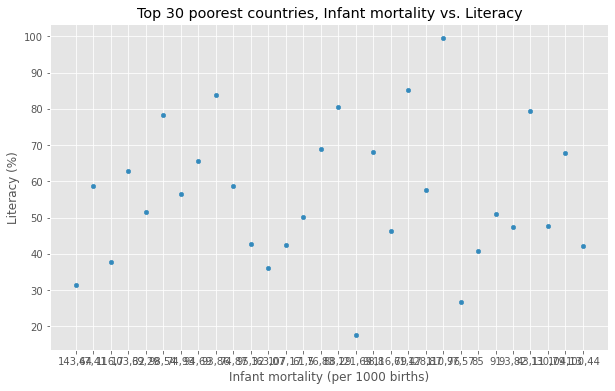

In [62]:
# countries.createOrReplaceTempView("countries")
# query = "select * from countries order by 'GDP ($ per capita)' asc"
# df =spark.sql(query)
# df.toPandas()
df = (countries.select('Country','GDP ($ per capita)','Infant mortality (per 1000 births)','Literacy (%)')
      .orderBy(asc("GDP ($ per capita)"))
      # .orderBy(desc("Infant mortality (per 1000 births)"))
      .na.drop()
      .limit(30)
      # .show(10)
      .toPandas()
)

display(df)

df.plot(x="Infant mortality (per 1000 births)",y="Literacy (%)",kind="scatter",figsize=(10, 6),title='Top 30 poorest countries, Infant mortality vs. Literacy')
plt.show()


# df = countries.orderBy(asc("GDP ($ per capita)")).select('Infant mortality (per 1000 births)','Literacy (%)').show(10)
# df.toPandas().plot(x="Infant mortality (per 1000 births)",y="Literacy (%)",kind="scatter",figsize=(10, 6))
# plt.show()


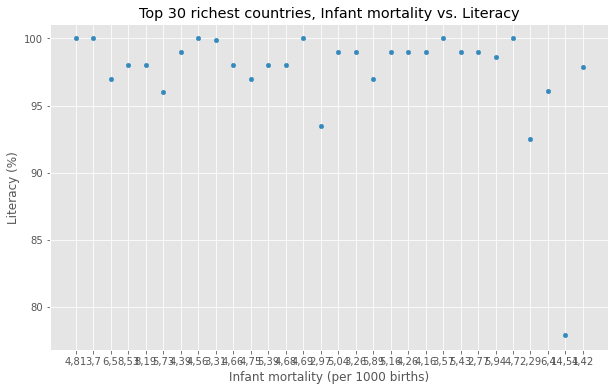

In [63]:
df = (countries.select('Country','GDP ($ per capita)','Infant mortality (per 1000 births)','Literacy (%)')
      .orderBy(desc("GDP ($ per capita)"))
      .na.drop()
      .limit(30)
      .toPandas()
)

df.plot(x="Infant mortality (per 1000 births)",y="Literacy (%)",kind="scatter",figsize=(10, 6),title='Top 30 richest countries, Infant mortality vs. Literacy')
plt.show()

In [80]:
file_path = 'airports.csv'
header = ['Airport ID','Name','City','Country','IATA','ICAO','Latitude','Longitude','Altitude','Timezone','DST','Tz database time zone','Type','Source']

schema = StructType() \
      .add("Airport ID",StringType(),True) \
      .add("Name",StringType(),True) \
      .add("City",StringType(),True) \
      .add("Country",StringType(),True) \
      .add("IATA",StringType(),True) \
      .add("ICAO",StringType(),True) \
      .add("Latitude",DoubleType(),True) \
      .add("Longitude",DoubleType(),True) \
      .add("Altitude",DoubleType(),True) \
      .add("Timezone",IntegerType(),True) \
      .add("DST",StringType(),True) \
      .add("Tz database time zone",StringType(),True) \
      .add("Type",StringType(),True) \
      .add("Source",StringType(),True) \


#       .add("Airport ID",IntegerType(),True) \
#       .add("Name",IntegerType(),True) \
#       .add("City",StringType(),True) \
#       .add("Country",StringType(),True) \
#       .add("IATA",StringType(),True) \
#       .add("ICAO",StringType(),True) \
#       .add("Latitude",DoubleType(),True) \
#       .add("Longitude",DoubleType(),True) \
#       .add("Altitude",IntegerType(),True) \
#       .add("Timezone",DoubleType(),True) \
#       .add("DST",DoubleType(),True) \
#       .add("Tz database time zone",StringType(),True) \
#       .add("Type",StringType(),True) \
#       .add("Source",StringType(),True) \


# countries = spark.read.csv(file_path,header=False,inferSchema=True)


# countries = spark.read.csv(file_path,header=False).schema(schema)

countries =spark.read.format("csv") \
      .option("header", True) \
      .schema(schema) \
      .load("airports.csv")

print(countries.dtypes)

countries.toPandas()

[('Airport ID', 'string'), ('Name', 'string'), ('City', 'string'), ('Country', 'string'), ('IATA', 'string'), ('ICAO', 'string'), ('Latitude', 'double'), ('Longitude', 'double'), ('Altitude', 'double'), ('Timezone', 'int'), ('DST', 'string'), ('Tz database time zone', 'string'), ('Type', 'string'), ('Source', 'string')]


,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20.0,10.0,U,Pacific/Port_Moresby,airport,OurAirports
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388.0,10.0,U,Pacific/Port_Moresby,airport,OurAirports
2,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239.0,10.0,U,Pacific/Port_Moresby,airport,OurAirports
3,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146.0,10.0,U,Pacific/Port_Moresby,airport,OurAirports
4,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19.0,10.0,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7178,12053,Rugao Air Base,Rugao,China,RUG,ZSRG,32.257885,120.501656,0.0,NaN,\N,\N,airport,OurAirports
7179,12054,Wuhu Air Base,Wuhu,China,WHU,ZSWU,31.390600,118.408997,0.0,NaN,\N,\N,airport,OurAirports
7180,12055,Shanshan Airport,Shanshan,China,SXJ,ZWSS,42.911701,90.247498,0.0,NaN,\N,\N,airport,OurAirports
7181,12056,Yingkou Lanqi Airport,Yingkou,China,YKH,ZYYK,40.542524,122.358600,0.0,NaN,\N,\N,airport,OurAirports
